In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sympy import symbols, Eq, diff, expand, solve

In [5]:
def original_function(coeffs, x):
    k, c = coeffs[0], coeffs[1]
    return (k * x ** 2) / (c + x ** 2)

In [6]:
def reworked_function(coeffs, x):
    a, b = coeffs[0], coeffs[1]
    return a + b * x

In [7]:
nodes = np.array([0.5, 0.8, 1.5, 2.5, 4])

In [8]:
values = np.array([1.1, 2.4, 5.3, 7.6, 8.9])

In [9]:
transformed_nodes = np.array([1/node**2 for node in nodes])

In [10]:
transformed_values = np.array([1/value for value in values])

In [11]:
a, b = symbols('a, b')
coeffs = (a, b)

In [12]:
phi = 0

In [14]:
for node, val in zip(transformed_nodes, transformed_values):
    phi += (val - reworked_function(coeffs, node)) ** 2

In [16]:
eq1 = Eq(diff(phi, a), 0)

In [18]:
eq2 = Eq(diff(phi, b), 0)

In [19]:
sols = solve([eq1, eq2])

In [30]:
new_coeffs = (1/sols[a], sols[b]/sols[a])

In [23]:
x_axis = np.linspace(min(nodes), max(values))

In [25]:
y_axis = original_function(new_coeffs, x_axis)

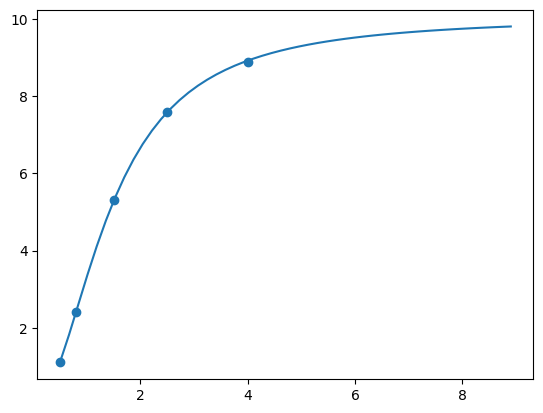

In [27]:
plt.scatter(nodes, values)
plt.plot(x_axis, y_axis)